<a href="https://colab.research.google.com/github/hajerFrigui/ChatBot/blob/master/ChatBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install nlp-utils

In [5]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt 


In [6]:
#import the txt file that contain querries and responses
from google.colab import files
uploaded = files.upload()

Saving dialogs.txt to dialogs.txt


In [8]:
#convet the file into a dataframe
df = pd.read_csv("dialogs.txt", names=('Query', 'Response'), sep=('\t'))
df

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


Undrestand data

In [76]:
df.shape

(3725, 6)

In [77]:
df.columns

Index(['Query', 'Response', 'neg', 'neu', 'pos', 'compound'], dtype='object')

In [78]:
df.info

<bound method DataFrame.info of                                                   Query  ... compound
0                                hi  how are you doing   ...   0.0000
1                         i m fine  how about yourself   ...   0.2023
2                   i m pretty good  thanks for asking   ...   0.8402
3                     no problem  so how have you been   ...  -0.5994
4                      i ve been great  what about you   ...   0.6249
...                                                 ...  ...      ...
3720    that s a good question  maybe it s not old age   ...   0.4404
3721                              are you right handed   ...   0.0000
3722                                  yes  all my life   ...   0.4019
3723  you re wearing out your right hand  stop using...  ...   0.2500
3724        but i do all my writing with my right hand   ...   0.6486

[3725 rows x 6 columns]>

In [79]:
df.describe()

,neg,neu,pos,compound
count,3725.000000,3725.000000,3725.000000,3725.000000
mean,0.064805,0.796124,0.139071,0.083273
std,0.154693,0.238994,0.215547,0.303132
min,0.000000,0.000000,0.000000,-0.897900
25%,0.000000,0.609000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.286000,0.318200
max,1.000000,1.000000,1.000000,0.900100


Data Visualization

In [9]:
#vader_lexicon: a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotio
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [10]:
text = df['Query']

In [ ]:
sid = SentimentIntensityAnalyzer()
for sentence in text:
    print(sentence)

    ss = sid.polarity_scores(sentence)
    for k in ss:
      #k={neg,neu,pos,compound}
      #ss[k]: 0.236
        print ('{0}: {1}, '.format(k,ss[k]),end='')
    print()



In [14]:
analyser = SentimentIntensityAnalyzer()
#text: df['query']
#add a rating column to our dataframe dataframe
df['rating'] = text.apply(analyser.polarity_scores)
df = pd.concat([df.drop(['rating'],axis = 1), df['rating'].apply(pd.Series)], axis=1)
df

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [15]:
from wordcloud import WordCloud
#wordcloud:technique used for representing text data in which the size of each word indicates its frequency or importance

In [16]:
def wordcloud(df, label):

    subset = df[df[label]==1]
    text=df.Query.values
    wc = WordCloud(background_color="black", max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("words freuented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth', random_state=244), alpha=0.98)

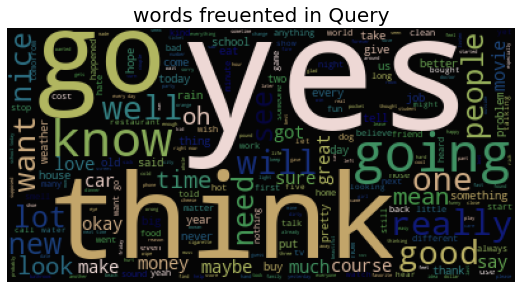

In [19]:
wordcloud(df,'Query')

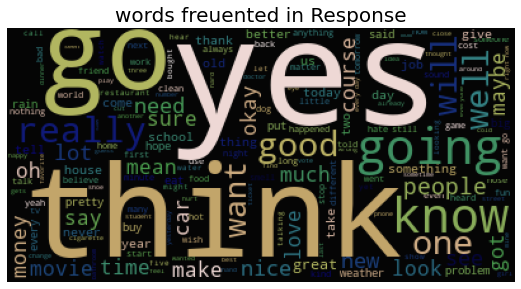

In [20]:
wordcloud(df,'Response')

Text Normalization : 
change and convert data 

In [17]:
import re

In [18]:
remove_n = lambda x: re.sub("\n", " ",x)

In [19]:
lower = lambda x : re.sub('[%s]' % re.escape(string.punctuation), ' ',x.lower())

In [20]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

In [21]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

In [22]:
df['Query'] = df['Query'].map(alphanumeric).map(lower).map(remove_n).map(remove_non_ascii)

In [23]:
df['Response'] = df['Response'].map(alphanumeric).map(lower).map(remove_n).map(remove_non_ascii)

In [24]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right handed,0.000,0.707,0.293,0.4404
3721,are you right handed,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,you re wearing out your right hand stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


In [25]:
imp_sent = df.sort_values(by='compound', ascending=False)
imp_sent.head(5)

,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


In [34]:
pos_sent = df.sort_values(by = 'pos', ascending=False)
pos_sent.head(5)

,Query,Response,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no that s incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


In [26]:
neg_sent = df.sort_values(by = 'neg', ascending=False)
neg_sent.head(5)

,Query,Response,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


In [27]:
neu_sent = df.sort_values(by = 'neu', ascending=False)
neu_sent.head(5)

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,oh that s so delicious,0.0,1.0,0.0,0.0
1596,what is gravity,it s the force that pulls everything down,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don t understand,0.0,1.0,0.0,0.0
1598,i don t understand,if you pour water into a glass the water goes...,0.0,1.0,0.0,0.0


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
#will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents

In [48]:
tfid = TfidfVectorizer()
# convert the query column to an array then transform it with tfid to a table (index are the word)
factors = tfid.fit_transform(df['Query']).toarray()
tfid.get_feature_names()

['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aids',
 'air',
 'airport',
 'aisle',
 'alarm',
 'alice',
 'alive',
 'all',
 'allergic',
 'alley',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altitude',
 'always',
 'am',
 'amateur',
 'amazing',
 'american',
 'an',
 'and',
 'andy',
 'angeles',
 'angry',
 'animal',
 'animals',
 'anita',
 'anniversary',
 'another',
 'answer',
 'answered',
 'antenna',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apartment',
 'apologize',
 'apologized',
 'apples',
 'appointment',
 'appreciate',
 'april',
 'are',
 'aren',
 'argument',
 'arizona',
 'arm',
 'arms',
 'army',
 'around',
 'arrow',
 'art',
 'a

**ChatBot**

In [75]:
from sklearn.metrics.pairwise import cosine_distances


In [74]:
def chatbot(query):

  #1 etape:convert  word to its base form: ‘Caring’ -> Lemmatization -> ‘Care’ 
   
   #query= nu.lemmatization_sentence(query)

  #2 etape : transform the query to a table  to calculate the frequency of every word 
    query_vector = tfid.transform([query]).toarray()
   #3 etape : calculate the distance between the query and the querries
    similar_score = 1 -cosine_distances(factors, query_vector)
    index = similar_score.argmax()
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match': matching_question,
                 'response': response,
                  'score':confidence,
                  'pos': pos_score,
                 'neg': neg_score,
                 'neu': pos_score
                    }
    return chat_dict 

In [72]:
while True:
     query = input('User: ')
     if query == 'exit':
        break
        
     response = chatbot(query)
     if response['score'] <=0.2 :
        print('Bot : Please rephraser your question.')
     else:
         print('='*80)
         print('logs:\n matched question :%r\n confidence score: %0.2f \npositiveScore: %r \n negativeScore: %r\n neutralScore: %r'%(response['match'],response['score']*100, response['pos'],response['neg'],response['neu']))
         print('='*80)
         print('Bot:', response['response'])

User: hi
logs:
 matched question :'hi  how are you doing '
 confidence score: 68.06 
positiveScore: 0.0 
 negativeScore: 0.0
 neutralScore: 0.0
Bot: i m fine  how about yourself 
User: i am fine 
logs:
 matched question :'so am i '
 confidence score: 56.62 
positiveScore: 0.0 
 negativeScore: 0.0
 neutralScore: 0.0
Bot: i had a long day 
User: did you get fat
logs:
 matched question :'did you get fat '
 confidence score: 100.00 
positiveScore: 0.0 
 negativeScore: 0.0
 neutralScore: 0.0
Bot: no  but i did put on a few pounds 
User: exit
